# **AlgorithmicToolbox Week 4: Divide and Conquer**

## 4-1: Binary Search

In [ ]:
n=int(input())
seq = [int(i) for i in input().split()]
n2=int(input())
search_seq = [int(i) for i in input().split()]
seq = seq[0:]

def binary_search(seq, elt, r):
    l = 0
    while l<=r: 
        m = (l+r)//2
        if elt > seq[m]:
            l = m + 1
        elif elt < seq[m]:
            r = m - 1
        else:
            return m
    return -1

soln = list()
for i in search_seq[0:]:
    ans = binary_search(seq, i, n-1)
    soln.append(ans)
print(' '.join([str(i) for i in soln]))

5
1 5 8 12 13
5
8 1 23 1 11
2 0 -1 0 -1


## 4-2: Binary Search with Duplicates

In [ ]:
n=int(input())
seq = [int(i) for i in input().split()]
n2=int(input())
search_seq = [int(i) for i in input().split()]
seq = seq[0:]

rl=[]
for e in seq:
    if e not in rl:
        rl.append(e)


def binary_search_d(seq, elt, r):
    l = 0
    
    while l<=r: 
        m = l+(r-l)//2
        
        if elt > seq[m]:
            l = m + 1
        elif elt < seq[m]:
            r = m - 1
        else:
            return m
    return -1

soln = list()
for i in search_seq[0:]:
    ans = binary_search_d(seq, i, n-1)
    soln.append(ans)
print(' '.join([str(i) for i in soln]))

7
2 4 4 4 7 7 9
4
9 4 5 2
6 3 -1 0


##4-3: Majority Element

In [ ]:
n = int(input())
seq = [int(i) for i in input().split()]


def divide_func(seq, l, r):
    if l+1==r:
        return seq[l]
    elif l+2==r:
        return seq[l]
    m = (l+r)//2
    left = divide_func(seq, l, m)
    right = divide_func(seq, m, r)

    c1, c2 = 0, 0
    for i in seq[l:r]:
        if i == left:
            c1+=1
        elif i == right:
            c2+=1
    if c1>(r-l)//2 and left != -1:
        return left
    elif c2>(r-l)//2 and right != -1:
        return right
    else: 
        return -1

print(int(divide_func(seq, 0, n) != -1))

5
2 3 9 2 2
1


##4-4: Improving QuickSort

In [ ]:
import random

def p(a, l, r):
    
    x = a[l]
    m1 = l
    m2 = l
    for i in range(l + 1, r + 1):
    	if a[i] < x:
        	a[i],a[m1] = a[m1],a[i]
        	m1+=1
        	m2+=1
        	a[i],a[m2] = a[m2],a[i]
    	elif a[i] == x:
        	m2+=1
        	a[i],a[m2] = a[m2],a[i]

    return m1,m2


def sort_quick(a, l, r):

    if l >= r:
        return

    k = random.randint(l, r)
    a[l], a[k] = a[k], a[l]
    j,k = p(a, l, r)
    sort_quick(a, l, j-1)
    sort_quick(a, k+1, r)


n = int(input())

a = list(map(int, input().split()))

sort_quick(a, 0, n - 1)

for x in a:
    print(x, end=' ')

5
2 3 9 2 2
2 2 2 3 9 

##4-5: Inversions

In [ ]:
def merge(left, right):
    i, j, inversion_counter = 0, 0, 0
    final = list()
    while i < len(left) and j< len(right):
        if left[i] <= right[j]:
            final.append(left[i])
            i += 1
        else:
            final.append(right[j])
            inversion_counter += len(left) - i
            j += 1

    final += left[i:]
    final += right[j:]
        
    return final, inversion_counter

def mergesort(arr):
    global tot_count
    if len(arr) <= 1:
        return arr
    mid = len(arr)//2

    left = mergesort(arr[:mid])
    right = mergesort(arr[mid:])

    sorted_arr, temp = merge(left, right)
    tot_count += temp

    return sorted_arr

tot_count = 0
n = int(input())
seq = [int(i) for i in input().split()]
mergesort(seq)
print(tot_count)

5
2 3 9 2 9
2


##4-6: Organizing a Lottery

In [ ]:
master_list = list()
s, p = [int(i) for i in input().split()]

for i in range(s):
    a, b = [int(i) for i in input().split()]
    master_list.append((a,'l'))
    master_list.append((b,'r'))

points = input().split()
for i in points:
    master_list.append((int(i),'p'))

master_list.sort()

segment_count = 0
point_segment_map = dict()
for i in master_list:
    if i[1] == 'l': segment_count += 1
    elif i[1] == 'r': segment_count -= 1
    else:
        point_segment_map[i[0]] = segment_count

temp = ''
for i in points:
    temp += str(point_segment_map[int(i)]) + ' '
print(temp[:-1])

2 3
0 5
7 10
1 6 11
1 0 0


##4-7:Closest Points

In [ ]:
import math
def dist(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def closest_split_pair(p_x, p_y, delta, best_pair):
    ln_x = len(p_x)  
    mx_x = p_x[ln_x // 2][0] 


    s_y = [x for x in p_y if mx_x - delta <= x[0] <= mx_x + delta]

    best = delta  
    ln_y = len(s_y)  
    for i in range(ln_y - 1):
        for j in range(i+1, min(i + 5, ln_y)):    
            p, q = s_y[i], s_y[j]
            dst = dist(p, q)
            if dst < best:
                best_pair = p, q
                best = dst
    return best_pair[0], best_pair[1], best


def brute(ax):
    mi = dist(ax[0], ax[1])
    p1 = ax[0]
    p2 = ax[1]
    ln_ax = len(ax)
    if ln_ax == 2:
        return p1, p2, mi
    for i in range(ln_ax-1):
        for j in range(i + 1, ln_ax):
            if i != 0 and j != 1:
                d = dist(ax[i], ax[j])
                if d < mi: 
                    mi = d
                    p1, p2 = ax[i], ax[j]
    return p1, p2, mi


def closest_pair(ax, ay):
    ln_ax = len(ax)  
    if ln_ax <= 3:
        return brute(ax)  
    mid = ln_ax // 2  
    Qx = ax[:mid]  
    Rx = ax[mid:]

    midpoint = ax[mid][0]
    Qy = list()
    Ry = list()
    for x in ay:  
        if x[0] < midpoint:
           Qy.append(x)
        else:
           Ry.append(x)
 
    (p1, q1, mi1) = closest_pair(Qx, Qy)
    (p2, q2, mi2) = closest_pair(Rx, Ry)


    if mi1 <= mi2:
        d = mi1
        mn = (p1, q1)
    else:
        d = mi2
        mn = (p2, q2)

    (p3, q3, mi3) = closest_split_pair(ax, ay, d, mn)

    if d <= mi3:
        return mn[0], mn[1], d
    else:
        return p3, q3, mi3


def solution(a):
    ax = sorted(a, key=lambda x: x[0])  
    ay = sorted(a, key=lambda x: (x[1], x[0]))  
    p1, p2, mi = closest_pair(ax, ay)  
    return mi



points = list()
n = int(input())
for i in range(n):
    points.append([int(i) for i in input().split()])

print(solution(points))

2
1 1
7 5
7.211102550927978


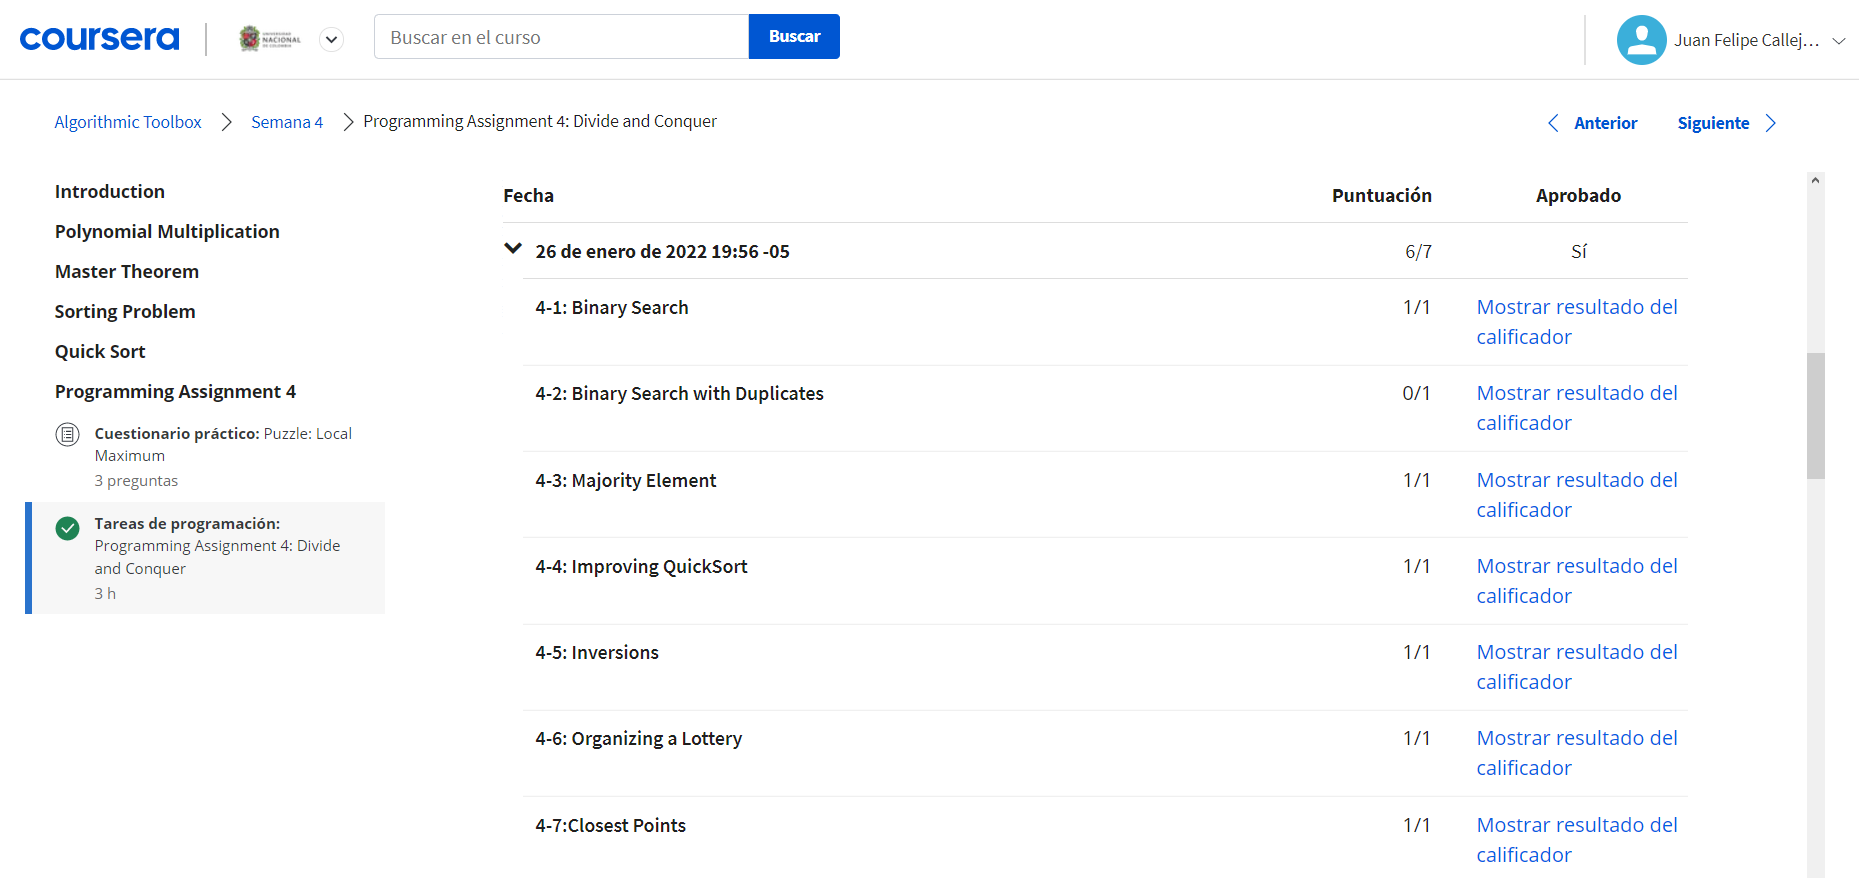

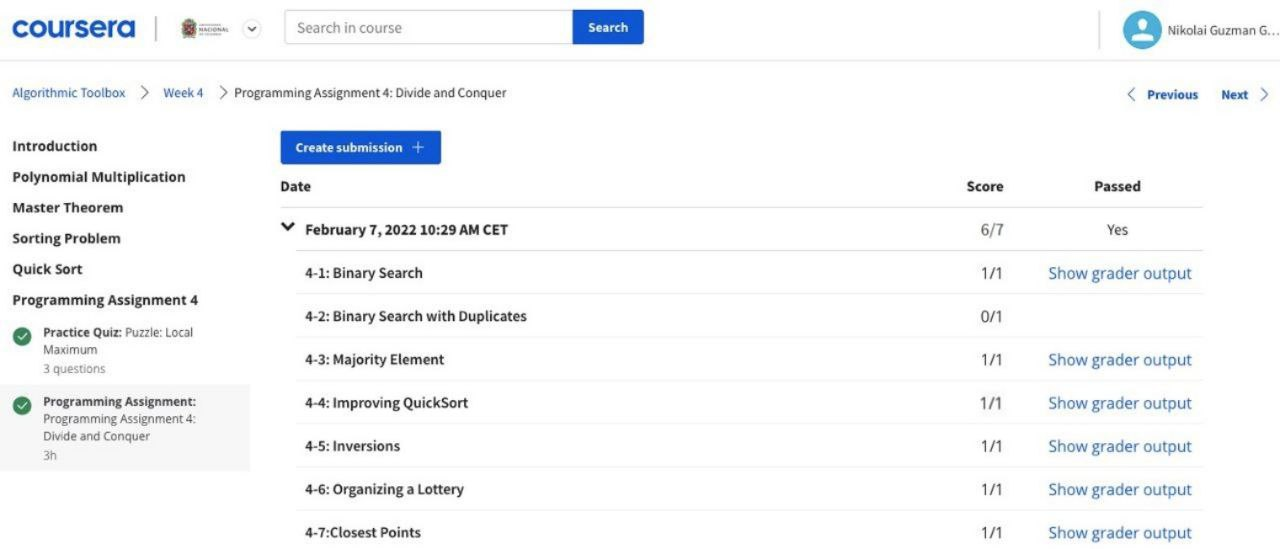

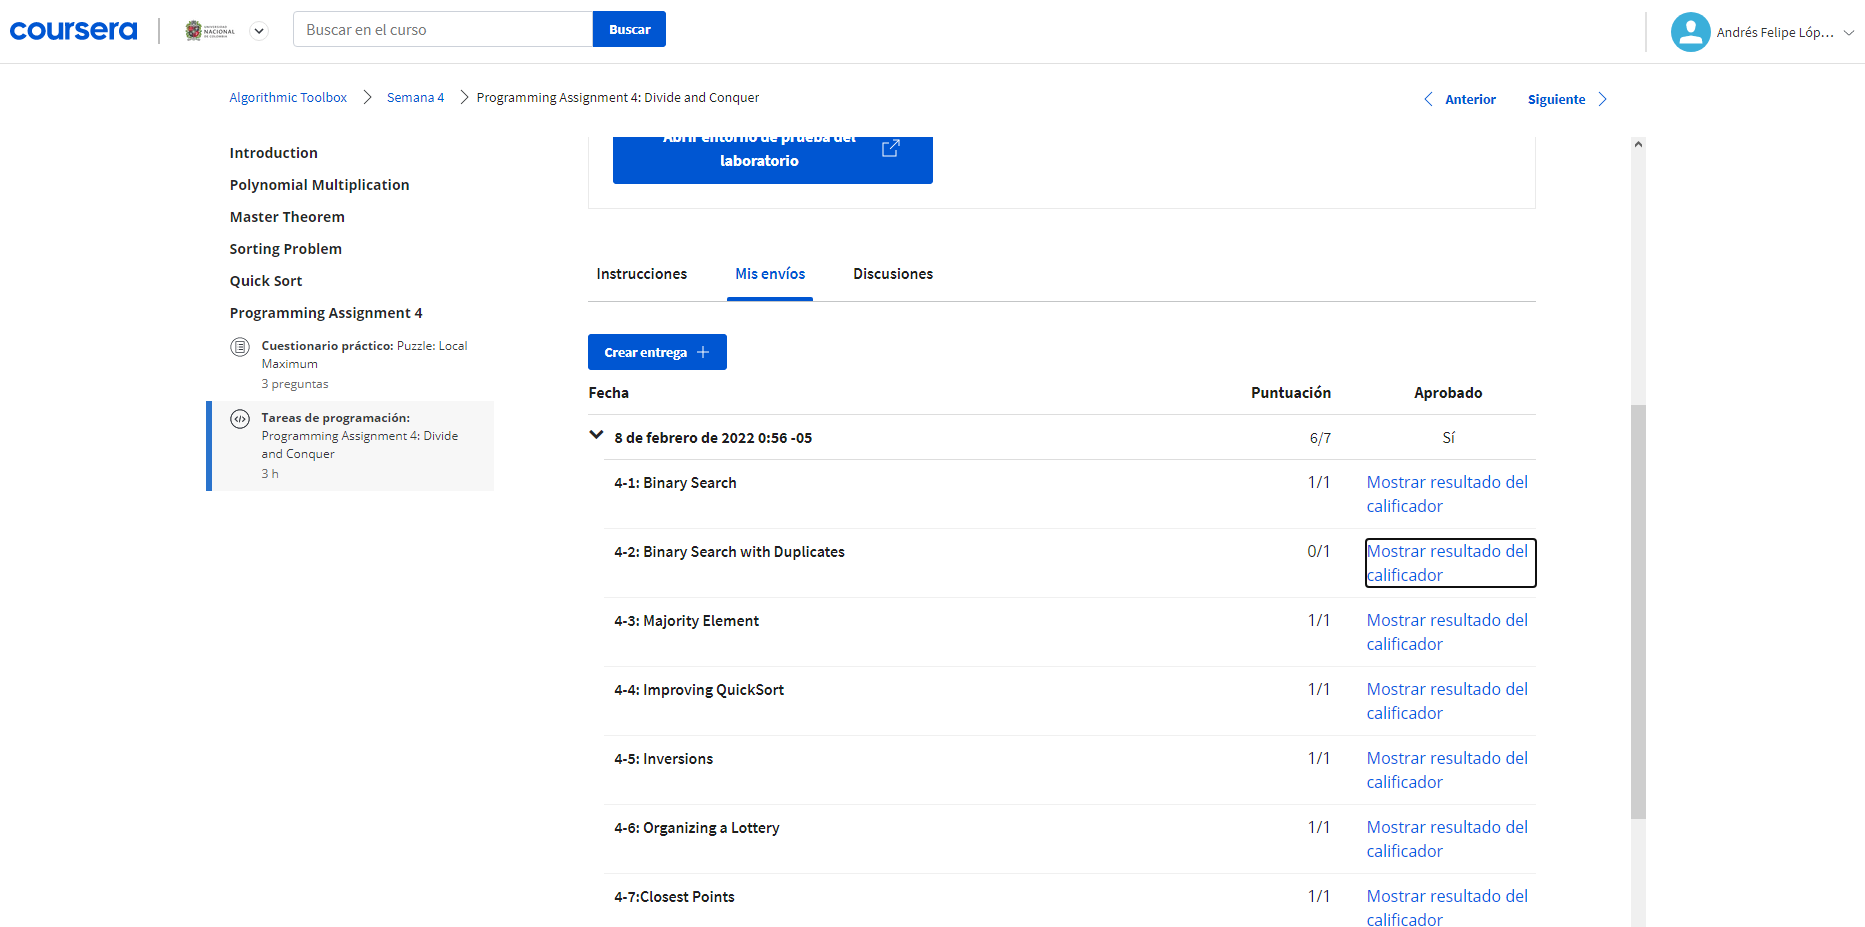